In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from scipy.optimize import curve_fit

## Para más información, lea [Cortez et al., 2009].
variables de entrada (basadas en pruebas fisicoquímicas):
   1 - acidez fija
   Acidas volátiles
   3 - Ácido cítrico
   4 - azúcar residual
   5 - cloruros
   6 - dióxido de azufre libre
   7 - dióxido de azufre total
   8 - densidad
   9 - pH
   10 - sulfatos
   11 - alcohol
Varia variable de salida (basada en datos sensoriales): 
   12 - calidad (cocina entre 0 y 10)

In [9]:
df_red=pd.read_csv("winequality-red.csv",delimiter=";")
df_white=pd.read_csv("winequality-white.csv", delimiter=";")

In [10]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [11]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


_Histograma de la calidad del Vino Tinto_

Text(0.5, 0.98, 'Distribución del alcohol en el Vino Tinto')

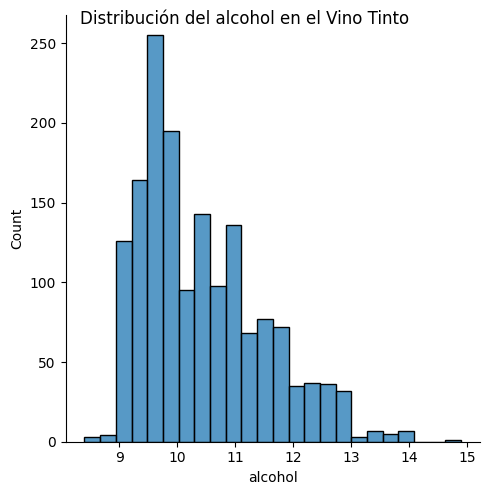

In [34]:
g=sns.displot(df_red["alcohol"], kind='hist')
g.fig.suptitle("Distribución del alcohol en el Vino Tinto")



_Un gráfico de Calidad de Vino Tinto vs los grados de alcohol de él, donde sumamos la calidad del vino_

Text(0.5, 1.0, 'Calidad de vino tinto')

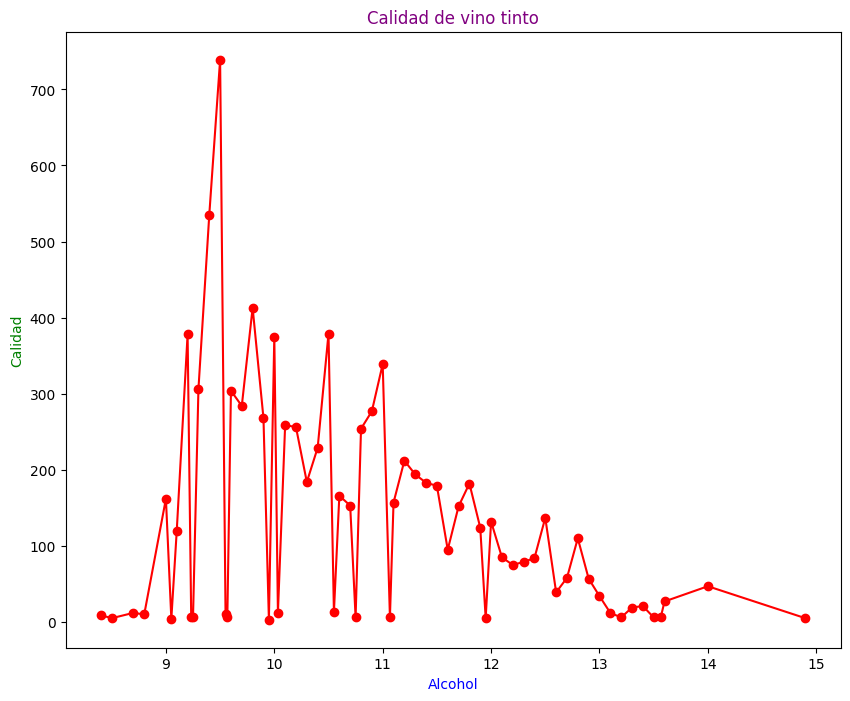

In [13]:
df_group=df_red.groupby("alcohol")["quality"].sum().reset_index()
plt.figure(figsize=(10,8))
plt.plot(df_group["alcohol"], df_group["quality"], marker='o', color='r')
plt.xlabel("Alcohol", color='b')
plt.ylabel("Calidad", color='g')
plt.title('Calidad de vino tinto', color='purple')

_Preparando el modelo de regresión lineal, donde estudiaremos la densidad y el alcohol del vino tinto_

Error cuadrático medio (MSE): 0.8710542581392993
Coeficiente de determinación (R²): 0.30031763228154307
Coeficientes: [-272.39829491]
Intercepción: 281.93763255234984


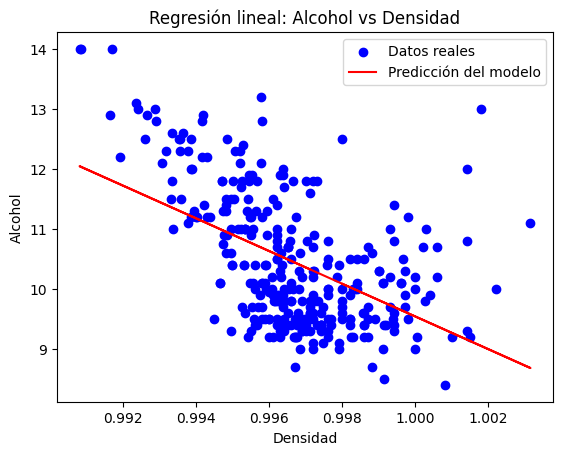

In [15]:
# Variables predictoras (X) y variable objetivo (y)
X = df_red[['density']]  # Columna de densidad como predictor
y = df_red['alcohol']     # Columna de alcohol como objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)
print("Coeficientes:", model.coef_)
print("Intercepción:", model.intercept_)

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción del modelo')
plt.xlabel('Densidad')
plt.ylabel('Alcohol')
plt.legend()
plt.title('Regresión lineal: Alcohol vs Densidad')
plt.show()


**En resumen, estos resultados indican que el modelo tiene un MSE de 0.871, lo que sugiere un error promedio moderado en las predicciones. El R² de 0.3003 indica que el modelo explica aproximadamente el 30.03% de la variabilidad en los datos. El coeficiente de -272.39829491 sugiere una relación negativa entre la variable independiente y la dependiente, y la intercepción de 281.93763255234984 es el valor predicho cuando la variable independiente es cero.**

_Realizamos un modelo de Clasificación de decisión de árbol para el vino tinto, usando la densidad, el alcohol y la calidad_

Exactitud del modelo: 0.5125

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.65      0.62       130
           6       0.47      0.52      0.49       132
           7       0.34      0.26      0.30        42
           8       0.00      0.00      0.00         5

    accuracy                           0.51       320
   macro avg       0.23      0.24      0.24       320
weighted avg       0.48      0.51      0.50       320



c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

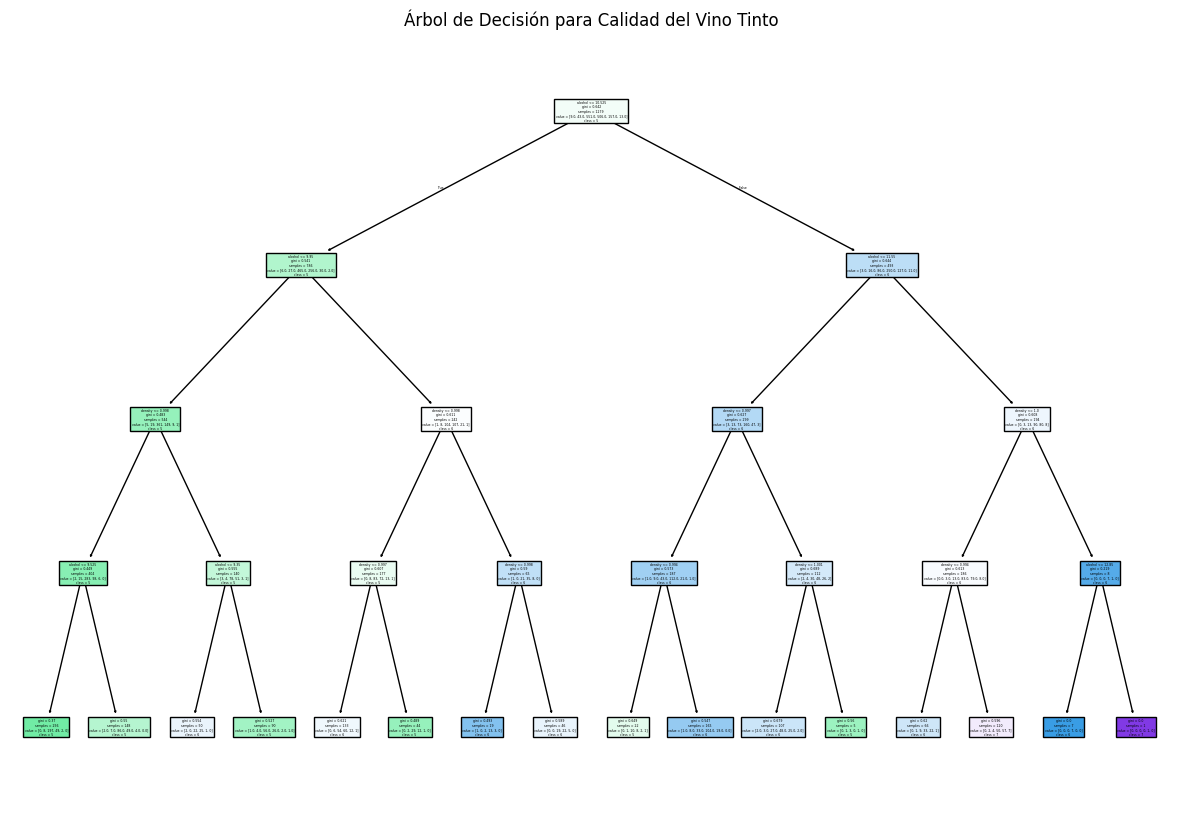

In [17]:
# Separar características (X) y etiqueta (y)
X = df_red[['density', 'alcohol']]  # Características predictoras
y = df_red['quality']              # Etiqueta a predecir

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=['density', 'alcohol'], class_names=[str(c) for c in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión para Calidad del Vino Tinto")
plt.show()


**El modelo tiene una exactitud del 51.25%, lo que indica un rendimiento moderado.**
**Las métricas de precisión, recall y F1-score varían significativamente entre las clases. Las clases 3, 4 y 8 tienen métricas de 0.0 debido a la falta de predicciones para esas clases.**
**Las métricas globales (macro avg y weighted avg) reflejan el rendimiento promedio del modelo, con valores relativamente bajos, lo que sugiere que el modelo no está funcionando bien para todas las clases.**
**Las advertencias indican que el modelo no está prediciendo ciertas clases, lo que puede ser un problema si esas clases son importantes.**

_Realizamos una regresión exponencial para la calidad y alcohol del vino tinto_

a = 2.9577, b = 0.0617


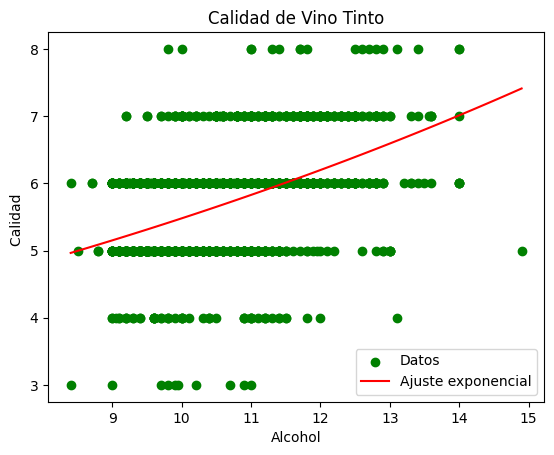

In [37]:
#regresión exponencial

x=df_red["alcohol"]
y=df_red["quality"]
# Definir la función exponencial
def exponencial(x, a, b):
    return a * np.exp(b * x)

# Ajustar los datos
parametros, covarianza = curve_fit(exponencial, x, y)
a, b = parametros

print(f"a = {a:.4f}, b = {b:.4f}")

# Predicciones y visualización
x_pred = np.linspace(min(x), max(x), 100)
y_pred = exponencial(x_pred, a, b)

plt.scatter(x, y, label="Datos", color ='g')
plt.plot(x_pred, y_pred, color="red", label="Ajuste exponencial")
plt.legend()
plt.xlabel("Alcohol")
plt.ylabel("Calidad ")
plt.title("Calidad de Vino Tinto")
plt.show()


_Regresión multiple incuyendo la acidez fija, la densidad, el alcohol y la calidad del vino tinto_

In [20]:
#regresion multiple

# Separar variables independientes (X) y dependiente (y)
X = df_red[['fixed acidity', 'density', 'alcohol']]
y = df_red['quality']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Obtener coeficientes
print(f"Intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")

# Predicciones
y_pred = model.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Predicción en nuevos datos
nuevos_datos = np.array([[6, 12, 15]])  # Nuevas variables independientes
prediccion = model.predict(nuevos_datos)
print(f"Predicción: {prediccion}")


Intercepto: 43.02951043837058
Coeficientes: [  0.09917617 -41.87101819   0.33641875]
MSE: 0.4777035018043347
R^2: 0.26901420247218477
Predicción: [-453.78136964]


c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**El modelo de regresión múltiple tiene un intercepto de 43.02951043837058 y coeficientes para fixed acidity, density, y alcohol de 0.09917617, -41.87101819, y 0.33641875, respectivamente.**
**El MSE de 0.4777035018043347 indica un error promedio moderado en las predicciones.**
**El R² de 0.26901420247218477 sugiere que el modelo explica aproximadamente el 26.9% de la variabilidad en los datos.**
**La predicción para los nuevos datos fixed acidity = 6, density = 12, y alcohol = 15 es -453.78136964, lo cual es un valor inusualmente bajo y puede indicar problemas con los datos de entrada o con el modelo.**

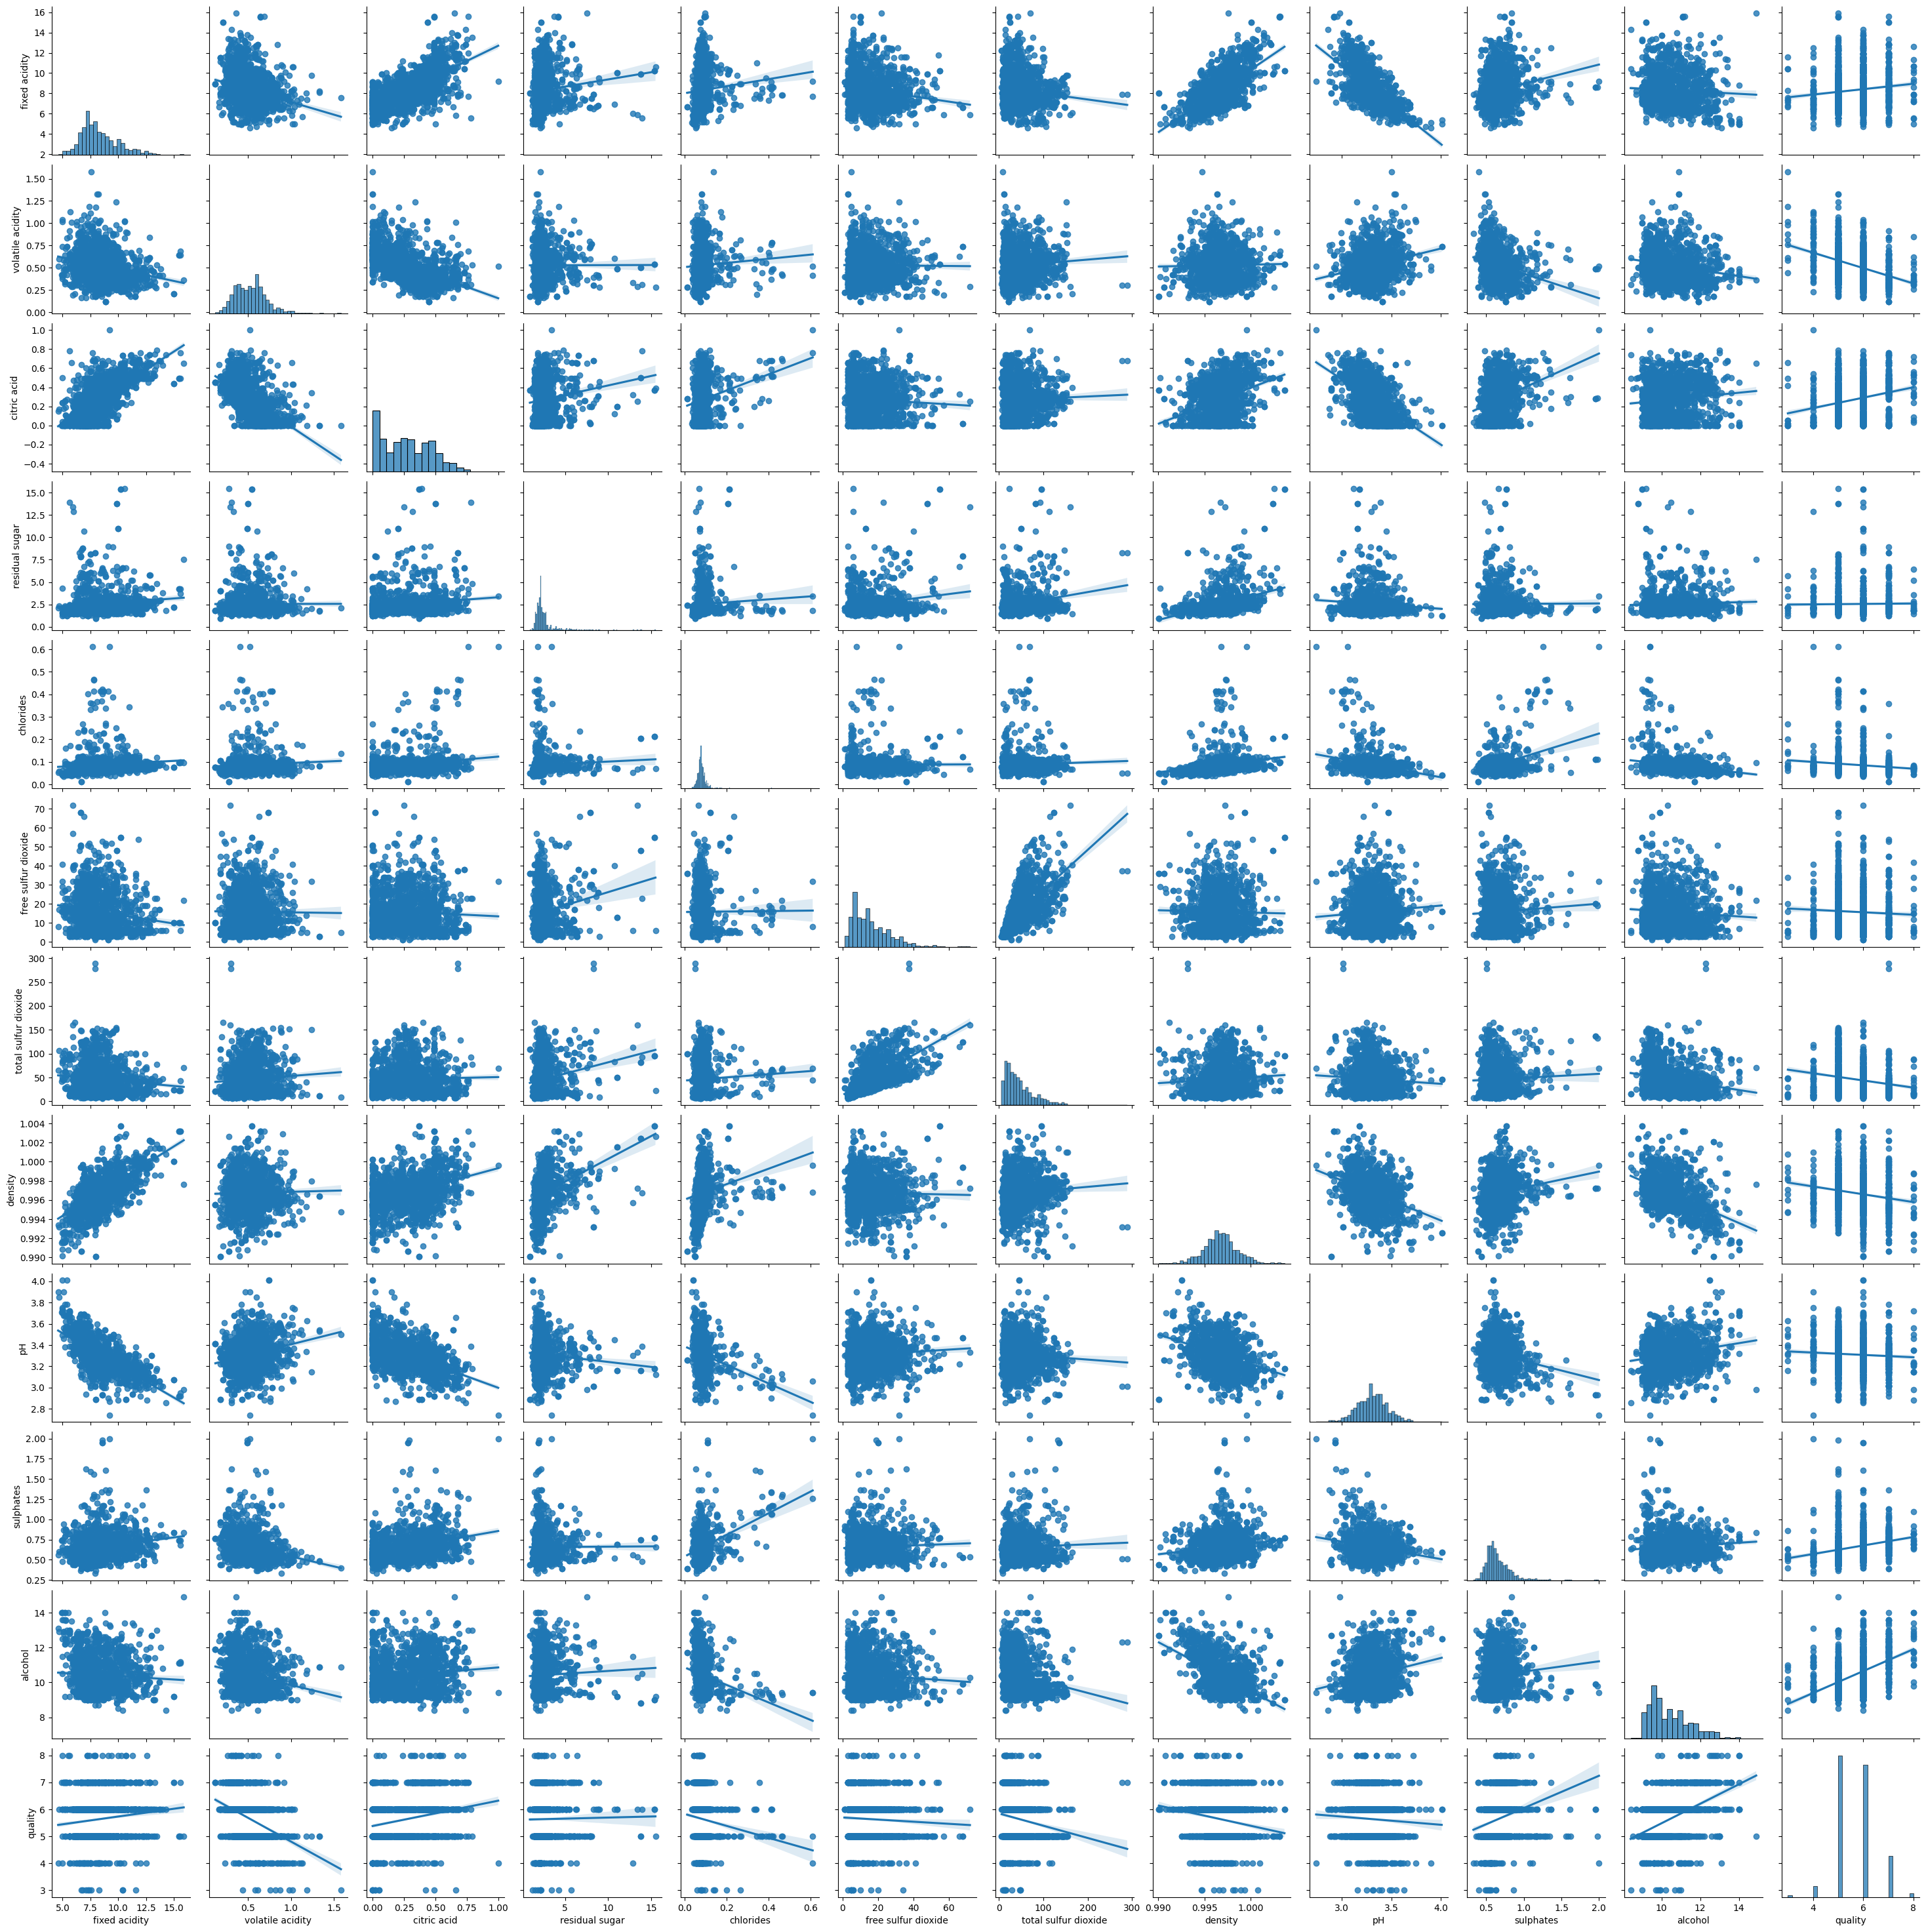

In [43]:
# Gráficos de la regresión multiple
sns.pairplot(df_red, kind='reg')
plt.show()

_Matriz de Correlación del vino tinto_

In [22]:
numeric_columns = df_red.select_dtypes(include=['number']).columns
corr = df_red[numeric_columns].corr()

<Axes: >

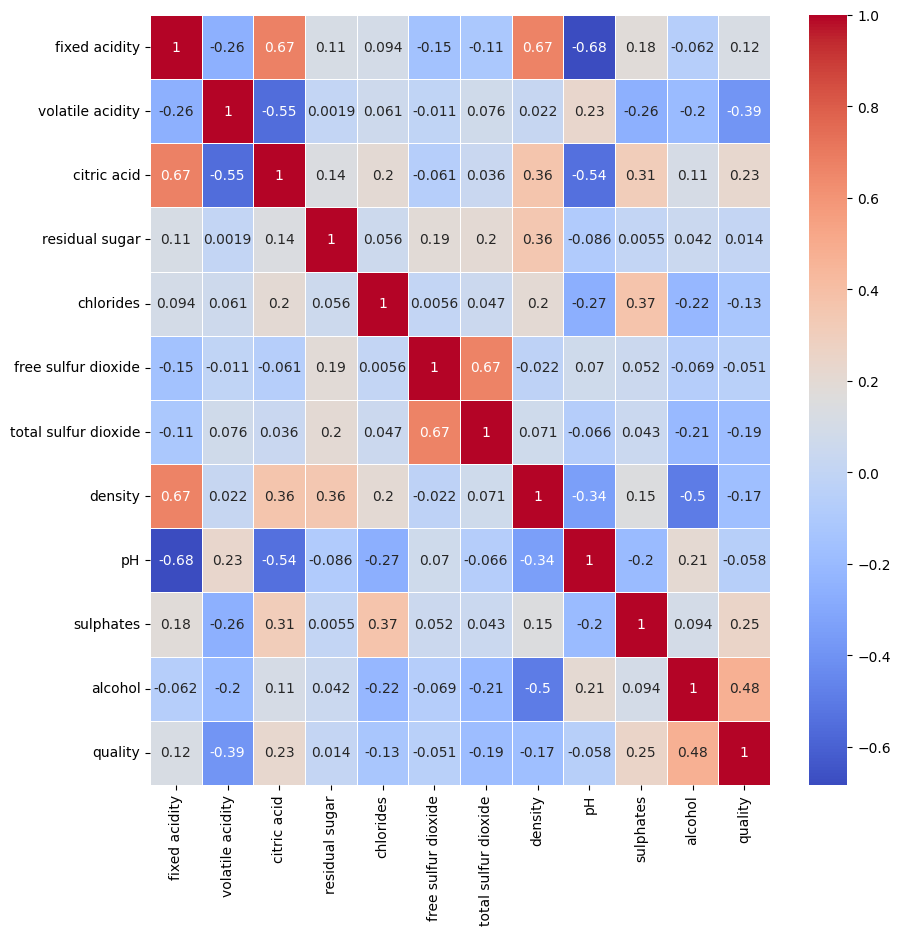

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

# **Machine Learning**

In [24]:
# Acá realizamos una mezcla de dataframes de vinos blanco y tinto
df_white['wine_type'] = 'white'
df_red['wine_type'] = 'red'

# Combinar los DataFrames
df_combined = pd.concat([df_white, df_red], ignore_index=True)


In [39]:
# Codificar la columna 'wine_type'
label_encoder = LabelEncoder()
df_combined['wine_type'] = label_encoder.fit_transform(df_combined['wine_type'])

# Escalar características
scaler = StandardScaler()
X = df_combined.drop(columns='quality')
X_scaled = scaler.fit_transform(X)

# Definir las etiquetas (target)
y = df_combined['quality']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6938461538461539
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.13      0.23        46
           5       0.71      0.78      0.74       420
           6       0.68      0.77      0.72       579
           7       0.70      0.52      0.60       221
           8       0.78      0.22      0.34        32

    accuracy                           0.69      1300
   macro avg       0.64      0.40      0.44      1300
weighted avg       0.70      0.69      0.68      1300



c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

El modelo Random Forest Classifier tiene una exactitud del 69.38%, lo que indica un rendimiento moderado.
Las métricas de precisión, recall y F1-score varían significativamente entre las clases. La clase 3 tiene métricas de 0.0 debido a la falta de predicciones para esa clase.
Las métricas globales (macro avg y weighted avg) reflejan el rendimiento promedio del modelo, con valores relativamente buenos, lo que sugiere que el modelo funciona razonablemente bien para la mayoría de las clases.
Las advertencias indican que el modelo no está prediciendo ciertas clases, lo que puede ser un problema si esas clases son importantes.

_Gráfico de la distribución de Calidad de Vinos Blanco y Tinto_

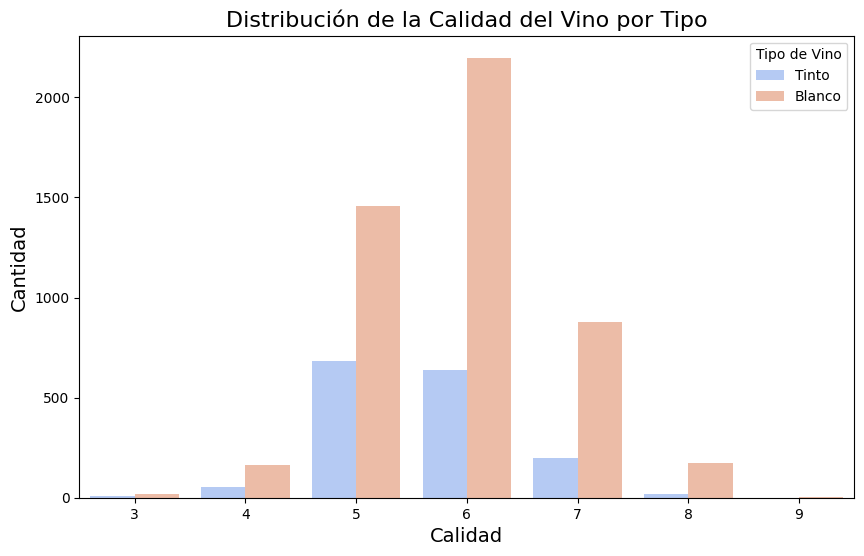

In [ ]:
# Graficar la distribución de la calidad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_combined, x='quality', hue='wine_type', palette='coolwarm')
plt.title('Distribución de la Calidad del Vino por Tipo', fontsize=16)
plt.xlabel('Calidad', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(title='Tipo de Vino', labels=['Tinto', 'Blanco'])
plt.show()

_Matriz de Correlación de los dos tipos de vino_

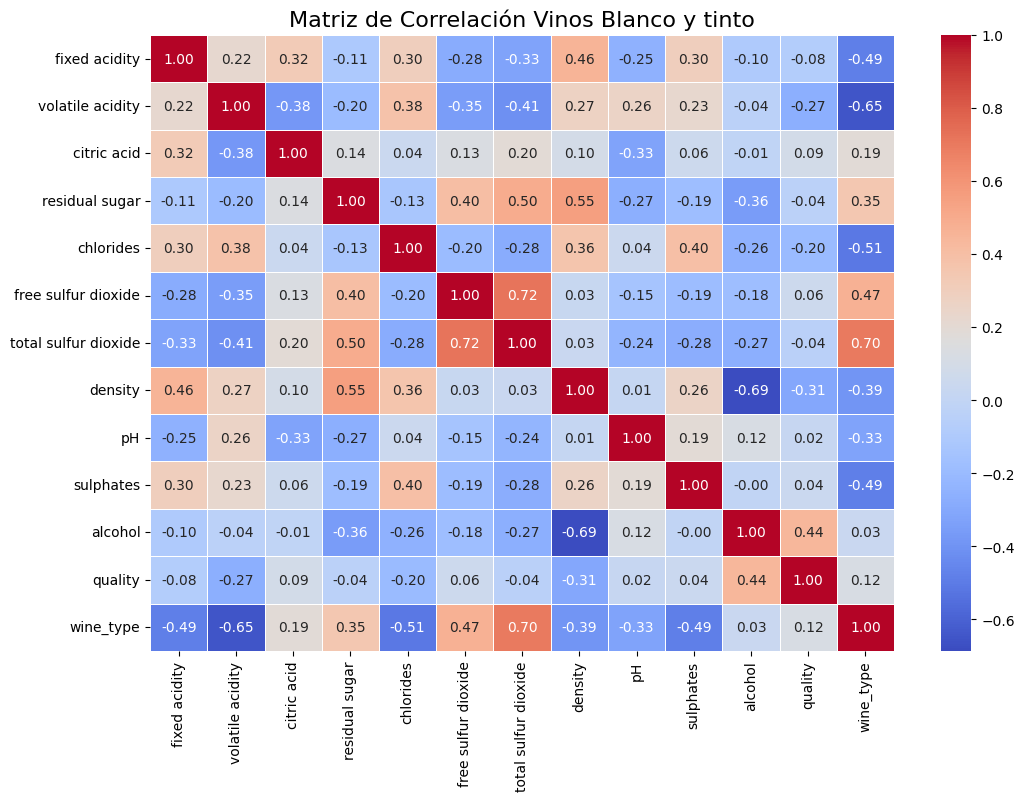

In [41]:
# Mapa de calor de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación Vinos Blanco y tinto', fontsize=16)
plt.show()


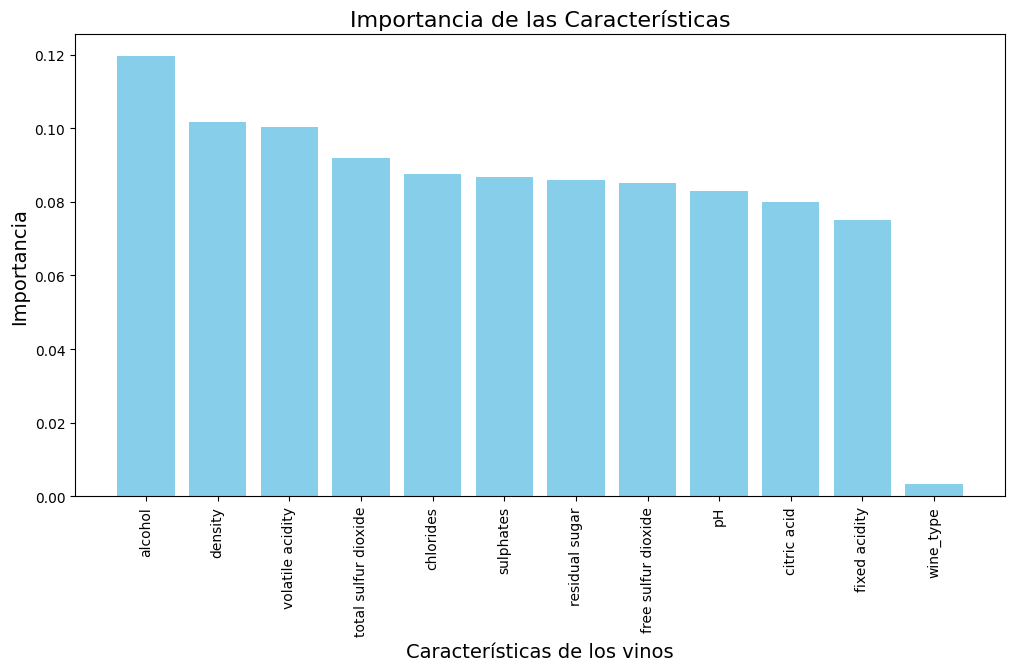

In [42]:
# Importancia de características del modelo
importances = model.feature_importances_
features = X.columns

# Ordenar por importancia
indices = np.argsort(importances)[::-1]

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices], align='center', color='skyblue')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title('Importancia de las Características', fontsize=16)
plt.xlabel('Características de los vinos', fontsize=14)
plt.ylabel('Importancia', fontsize=14)
plt.show()
